**This Data is already preprocessed where there are no null values and Probably there will no imbalance in Dataset**

**Milk Quality Prediction with Machine Learning (Classification)**

About dataset
This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

Usage:
The target variable is nothing but the Grade of the milk. It can be

Target:
Low (Bad),
Medium (Moderate),
High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
Temperature and ph are given their actual values in the dataset.

We have to perform data preprocessing, and data augmentation techniques to build statistical and predictive models to predict the quality of the milk.

Inspiration
To leverage the benefits of machine learning in the dairy industry.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [10]:
milkdata = pd.read_csv("csv/milknew.csv")

In [11]:
milkdata.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [12]:
milkdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [13]:
milkdata.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [14]:
milkdata.shape

(1059, 8)

Text(0.5, 1.0, 'Grade versus Colour')

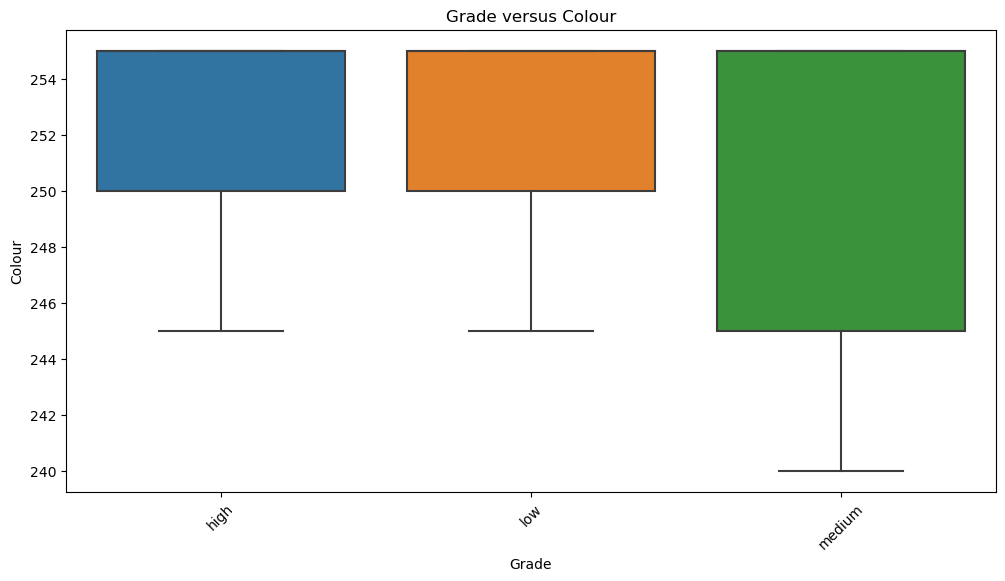

In [21]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Colour', data=milkdata)
plt.setp(ax.artists, alpha=.6, linewidth=3, edgecolor="l")
plt.xticks(rotation=45)
plt.title('Grade versus Colour')

Text(0.5, 1.0, 'Grade versus Turbidity')

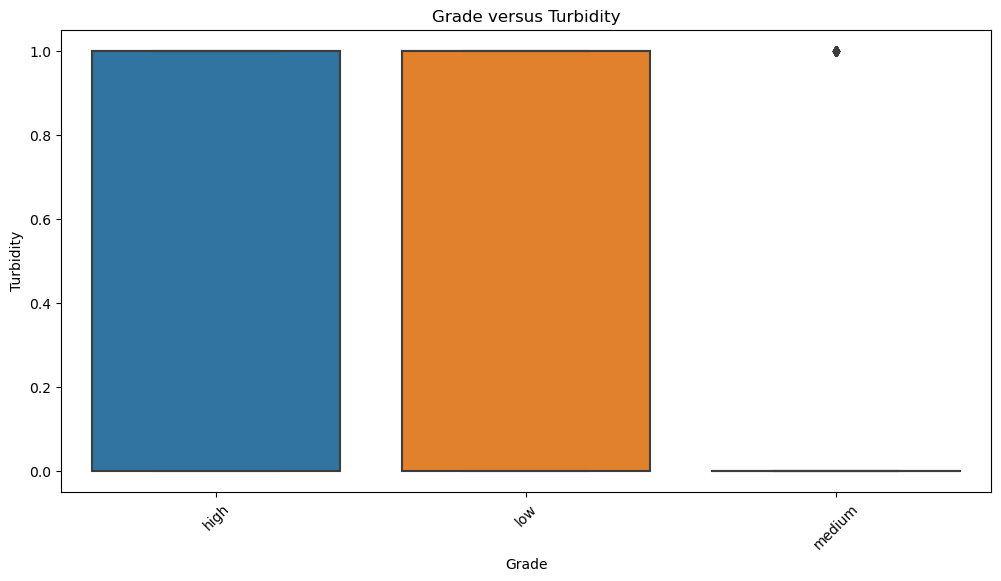

In [25]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Turbidity', data=milkdata)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade versus Turbidity')

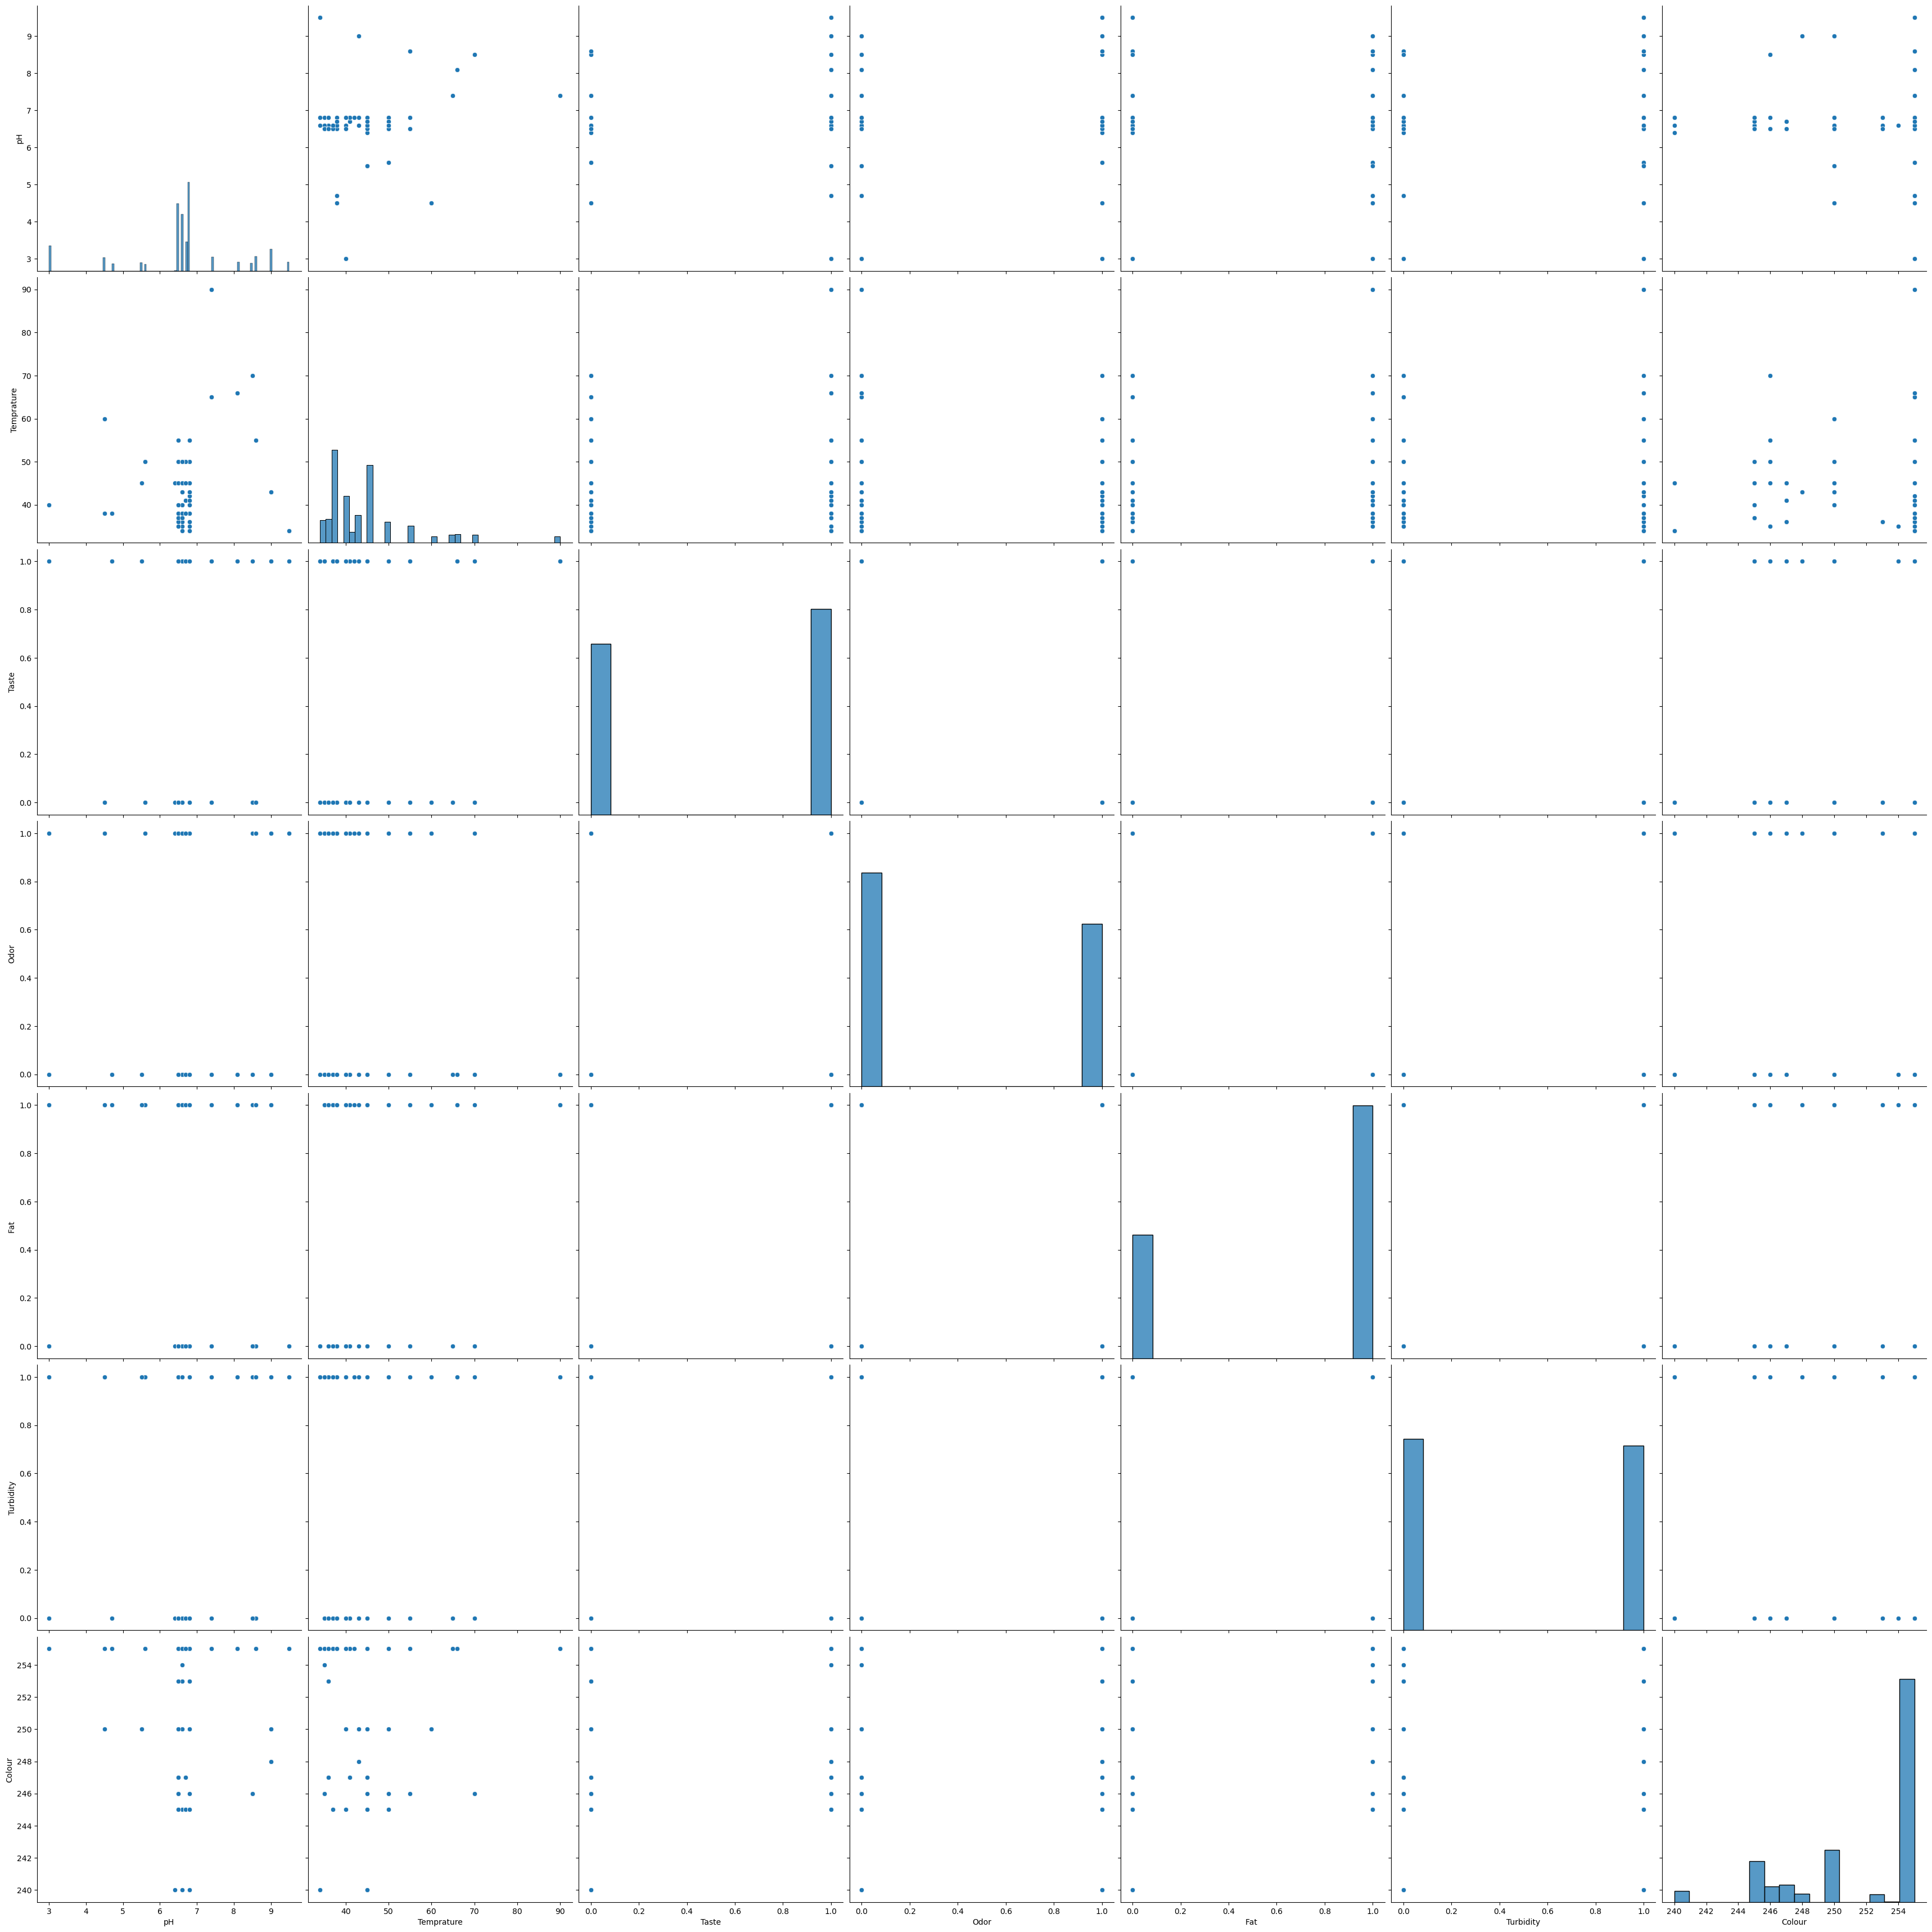

In [27]:
sns.pairplot(milkdata,height=5)

In [28]:
milkdata.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


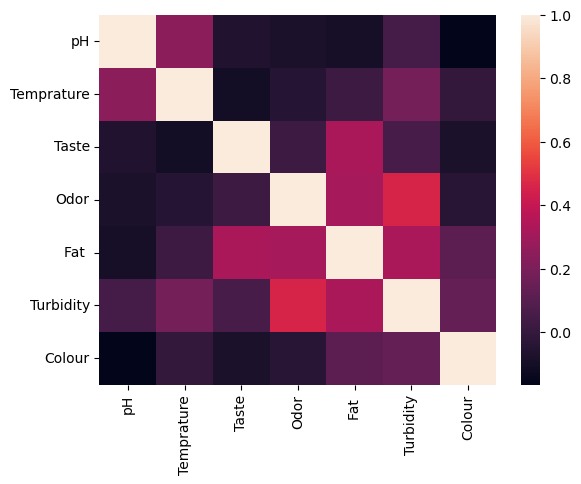

In [31]:
sns.heatmap(milkdata.corr());

## Preparing Data

In [34]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
milkdata['Grade']= label_encoder.fit_transform(milkdata['Grade'])
  
milkdata['Grade'].unique()

array([0, 1, 2])

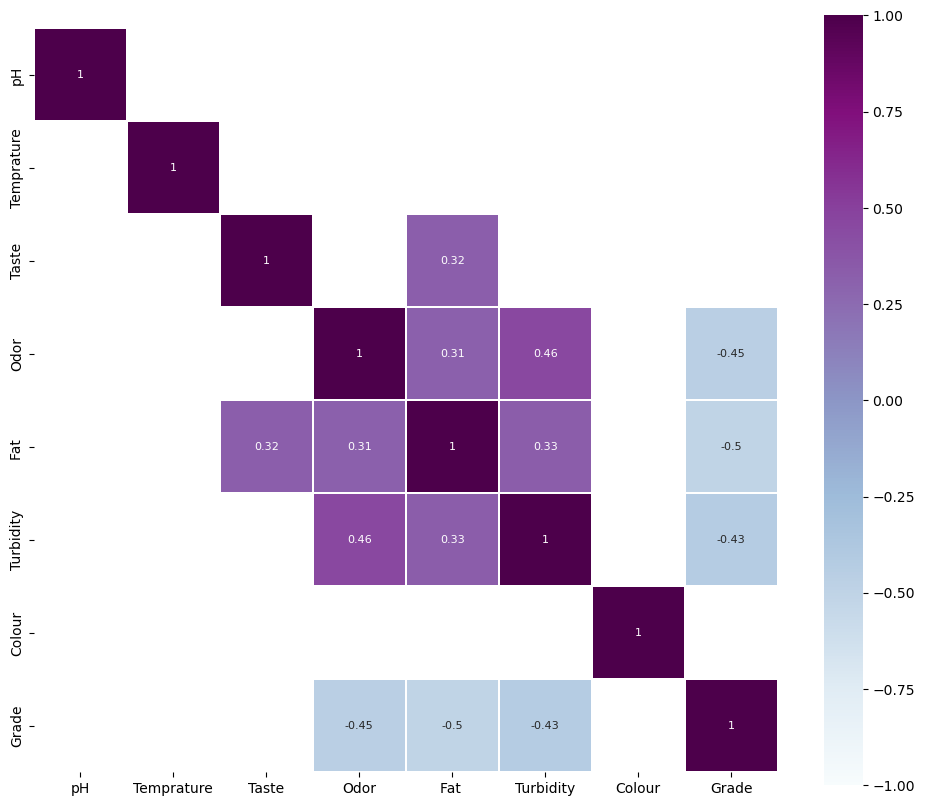

In [38]:
corr = milkdata.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='BuPu', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

In [40]:
X = milkdata[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y = milkdata[['Grade']]

In [41]:
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(741, 7)
(741, 1)
(318, 7)
(318, 1)


## Model Building

### Decision tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [47]:
dtmodel = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dt_predictions = dtmodel.predict(X_test)

In [49]:
# creating a confusion matrix
coma = confusion_matrix(y_test, dt_predictions)

In [50]:
coma

array([[  0,   0,  76],
       [  0,  87,  28],
       [  0,   0, 127]], dtype=int64)

In [51]:
print(coma)

[[  0   0  76]
 [  0  87  28]
 [  0   0 127]]


### Support Vector Machine

In [52]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
  
# creating a confusion matrix
coma = confusion_matrix(y_test, svm_predictions)

In [53]:
print(coma)

[[ 70   3   3]
 [ 15  98   2]
 [ 14   8 105]]


### KNN

In [54]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
coma = confusion_matrix(y_test, knn_predictions)
print(coma)

0.9685534591194969
[[ 69   0   7]
 [  1 112   2]
 [  0   0 127]]


### Naive Baiyes

In [57]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
  
# accuracy on X_test
accuracy = nb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
coma = confusion_matrix(y_test, nb_predictions)
print(coma)

0.9025157232704403
[[ 64   0  12]
 [  5 108   2]
 [  5   7 115]]


### Simple Predictions

In [61]:
predictions = nb.predict(np.array([[3,2,0,1,3,2,0]]))
predictions

array([1])

In [67]:
predictions1 = nb.predict(np.array([[0,0,0,1,3,0,20]]))
predictions1

array([2])